# MoNuSeg setup

In [84]:
import matplotlib.pyplot as plt 
from PIL import Image
import pandas as pd
import numpy as np
import os
from os.path import join


In [85]:
!ls ../data/MoNuSeg/MoNuSegTrainingData/Annotations

TCGA-18-5592-01Z-00-DX1.xml  TCGA-DK-A2I6-01A-01-TS1.xml
TCGA-21-5784-01Z-00-DX1.xml  TCGA-E2-A14V-01Z-00-DX1.xml
TCGA-21-5786-01Z-00-DX1.xml  TCGA-E2-A1B5-01Z-00-DX1.xml
TCGA-38-6178-01Z-00-DX1.xml  TCGA-G2-A2EK-01A-02-TSB.xml
TCGA-49-4488-01Z-00-DX1.xml  TCGA-G9-6336-01Z-00-DX1.xml
TCGA-50-5931-01Z-00-DX1.xml  TCGA-G9-6348-01Z-00-DX1.xml
TCGA-A7-A13E-01Z-00-DX1.xml  TCGA-G9-6356-01Z-00-DX1.xml
TCGA-A7-A13F-01Z-00-DX1.xml  TCGA-G9-6362-01Z-00-DX1.xml
TCGA-AR-A1AK-01Z-00-DX1.xml  TCGA-G9-6363-01Z-00-DX1.xml
TCGA-AR-A1AS-01Z-00-DX1.xml  TCGA-HE-7128-01Z-00-DX1.xml
TCGA-AY-A8YK-01A-01-TS1.xml  TCGA-HE-7129-01Z-00-DX1.xml
TCGA-B0-5698-01Z-00-DX1.xml  TCGA-HE-7130-01Z-00-DX1.xml
TCGA-B0-5710-01Z-00-DX1.xml  TCGA-KB-A93J-01A-01-TS1.xml
TCGA-B0-5711-01Z-00-DX1.xml  TCGA-NH-A8F7-01A-01-TS1.xml
TCGA-CH-5767-01Z-00-DX1.xml  TCGA-RD-A8N9-01A-01-TS1.xml


In [86]:
!ls ../data/MoNuSeg/MoNuSegTrainingData/TissueImages

TCGA-18-5592-01Z-00-DX1.png  TCGA-DK-A2I6-01A-01-TS1.png
TCGA-21-5784-01Z-00-DX1.png  TCGA-E2-A14V-01Z-00-DX1.png
TCGA-21-5786-01Z-00-DX1.png  TCGA-E2-A1B5-01Z-00-DX1.png
TCGA-38-6178-01Z-00-DX1.png  TCGA-G2-A2EK-01A-02-TSB.png
TCGA-49-4488-01Z-00-DX1.png  TCGA-G9-6336-01Z-00-DX1.png
TCGA-50-5931-01Z-00-DX1.png  TCGA-G9-6348-01Z-00-DX1.png
TCGA-A7-A13E-01Z-00-DX1.png  TCGA-G9-6356-01Z-00-DX1.png
TCGA-A7-A13F-01Z-00-DX1.png  TCGA-G9-6362-01Z-00-DX1.png
TCGA-AR-A1AK-01Z-00-DX1.png  TCGA-G9-6363-01Z-00-DX1.png
TCGA-AR-A1AS-01Z-00-DX1.png  TCGA-HE-7128-01Z-00-DX1.png
TCGA-AY-A8YK-01A-01-TS1.png  TCGA-HE-7129-01Z-00-DX1.png
TCGA-B0-5698-01Z-00-DX1.png  TCGA-HE-7130-01Z-00-DX1.png
TCGA-B0-5710-01Z-00-DX1.png  TCGA-KB-A93J-01A-01-TS1.png
TCGA-B0-5711-01Z-00-DX1.png  TCGA-NH-A8F7-01A-01-TS1.png
TCGA-CH-5767-01Z-00-DX1.png  TCGA-RD-A8N9-01A-01-TS1.png


In [151]:
base_path = '../data/MoNuSeg/MoNuSegTrainingData/'
img_path = join(base_path,'TissueImages')
labels_path = join(base_path,'Annotations')


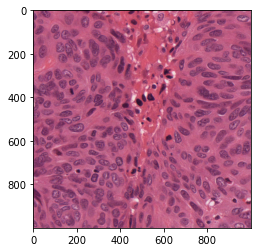

../data/MoNuSeg/MoNuSegTrainingData/TissueImages/TCGA-18-5592-01Z-00-DX1.png


In [152]:
img_filenames = sorted([p for p in os.listdir(img_path) if not 'ipynb' in p])

idx = 0
file_path = join(img_path, img_filenames[idx])

img = Image.open(file_path)
plt.imshow(img); plt.show()
print(file_path)

In [153]:
import xml

labels_filenames = sorted([p for p in os.listdir(labels_path) if not 'ipynb' in p])

file_path = join(labels_path, labels_filenames[idx])

doc = xml.dom.minidom.parse(file_path);
print(file_path)

../data/MoNuSeg/MoNuSegTrainingData/Annotations/TCGA-18-5592-01Z-00-DX1.xml


In [154]:
# get a list of all the region tags
regions = doc.getElementsByTagName('Region') 

In [155]:
# for each region tag
# get a list of all the vertexes (which are in order)
xy = []
for region in regions:
    verticies = region.getElementsByTagName('Vertex')
    xy.append([])
    
    # iterate through all verticies
    for vertex in verticies:
        # get the x value of that verte
        x = float(vertex.getAttribute('X'))
        # get the y value of that vertex
        y = float(vertex.getAttribute('Y'))
        
        xy[-1].append([x,y])



In [156]:
# https://github.com/scikit-image/scikit-image/issues/1103#issuecomment-52378754
from skimage import draw
import numpy as np
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=np.bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

In [157]:
n_img = np.array(img)
binary_mask = np.zeros(n_img.shape[:-1], dtype=np.bool)
color_mask = np.zeros_like(n_img, dtype=np.int32)
print(binary_mask.shape)
print(color_mask.shape)

(1000, 1000)
(1000, 1000, 3)


In [158]:
for i in range(len(xy)):
    points = np.array(xy[i])
    small_x = points[:,0]
    small_y = points[:,1]

    # make a mask and add it to the current mask
    # this addition makes it obvious when more than 
    # 1 layer overlap each.
    # Other, can be changed to simply an OR 
    # depending on application.
    
    polygon = poly2mask(small_x,small_y,n_img.shape[:-1])
    
    binary_mask |= polygon#.astype(int)
    
    r_rgb = np.random.randint(1,255,3)
#     color_mask[:,:,0] += polygon.astype(int)*r_rgb[0]
#     color_mask[:,:,1] += polygon.astype(int)*r_rgb[1]
#     color_mask[:,:,2] += polygon.astype(int)*r_rgb[2]
    color_mask += np.concatenate(
        (
            np.expand_dims(polygon.astype(int)*r_rgb[0], 2),
            np.expand_dims(polygon.astype(int)*r_rgb[1], 2),
            np.expand_dims(polygon.astype(int)*r_rgb[2], 2),
        ),
        axis=2
    )

binary_mask = binary_mask.T

In [159]:
# color norm
maxis = color_mask.max(0).max(0)
minis = color_mask.min(0).min(0)
print(maxis, minis)

# color_mask = color_mask

# color_mask = (color_mask - minis)/(maxis - minis)

# Rotate
color_mask = Image.fromarray((color_mask*255).astype(np.uint8))
color_mask = color_mask.rotate(-90).transpose(PIL.Image.FLIP_LEFT_RIGHT)


[483 473 480] [0 0 0]


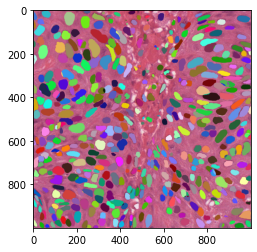

In [160]:
cond = np.array(color_mask)>0
colormasks = np.array(img)
colormasks[cond] = np.array(color_mask)[cond]

plt.imshow(colormasks)

In [161]:
m = np.zeros_like(binary_mask, dtype=np.float32) + 255
m[~binary_mask] = np.nan


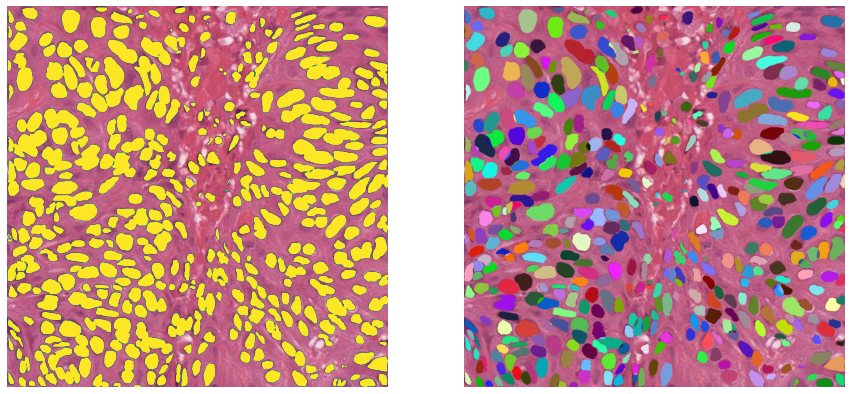

In [163]:
import PIL
fig, ax = plt.subplots(1,2, figsize=(15,15))

ax[0].imshow(img)
ax[0].imshow(binary_mask, alpha=binary_mask.astype(np.float32))

ax[1].imshow(colormasks)

ax[0].set_axis_off()
ax[1].set_axis_off()
plt.show()

# CPM17 setup 

In [164]:
base_path = '../data/CPM-17/cpm17/train'
img_path = join(base_path, 'Images')
labels_path = join(base_path, 'Labels')

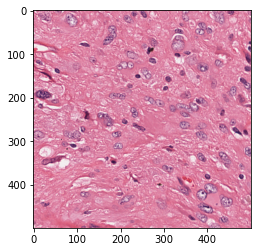

Number of images: 32
../data/CPM-17/cpm17/train/Images/image_00.png


In [165]:
img_filenames = sorted([p for p in os.listdir(img_path) if not 'ipynb' in p])

idx = 0
file_path = join(img_path, img_filenames[idx])

img = Image.open(file_path)
plt.imshow(img); plt.show()
print('Number of images:', len(img_filenames))
print(file_path)

In [166]:
import scipy.io

labels_filenames = sorted([p for p in os.listdir(labels_path) if not 'ipynb' in p])

file_path = join(labels_path, labels_filenames[idx])

mat = scipy.io.loadmat(file_path)
print(file_path)

../data/CPM-17/cpm17/train/Labels/image_00.mat


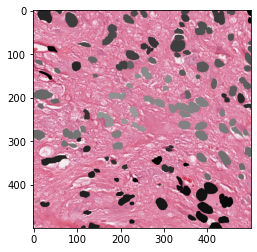

In [168]:
mask = mat['inst_map']
mask = np.repeat(mask[:,:,np.newaxis], 3, axis=2) 

masked_image = np.array(img)
masked_image[mask>0] = mask[mask>0]

plt.imshow(masked_image)

In [169]:
# Make binary mask
binary_mask = mat['inst_map']
binary_mask = (binary_mask > 0).astype(np.uint8)


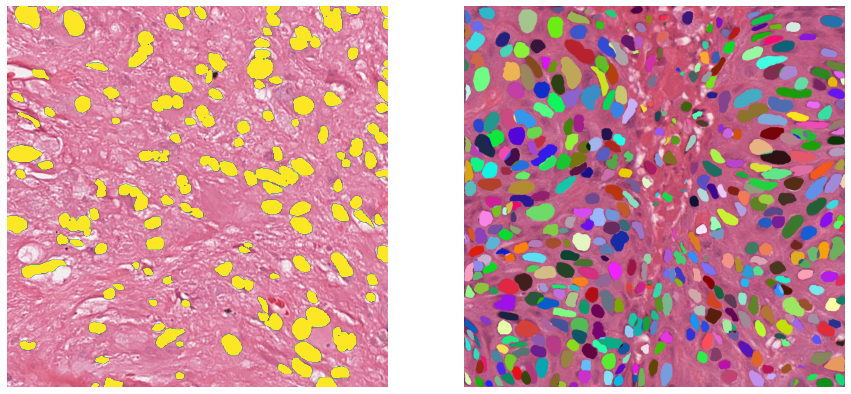

In [170]:

fig, ax = plt.subplots(1,2, figsize=(15,15))

ax[0].imshow(img)
ax[0].imshow(binary_mask, alpha=binary_mask.astype(np.float32))

ax[1].imshow(colormasks)

ax[0].set_axis_off()
ax[1].set_axis_off()
plt.show()